In [1]:
import tensorflow as tf
from ConvoAutoencoder import ConvoAutoencoder
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from data_utils import read_images

In [2]:
# start interactive tensorflow session
sess = tf.InteractiveSession()

In [3]:
# rejuvenate the trained variables
reawakened = tf.train.import_meta_graph('./-13.meta')
reawakened.restore(sess, tf.train.latest_checkpoint('./'))

INFO:tensorflow:Restoring parameters from ./-14


In [4]:
# creating our autoencoder
autoencoder = ConvoAutoencoder()

In [5]:
# importing the input image
input_image = read_images(['./test_frame01.png'])

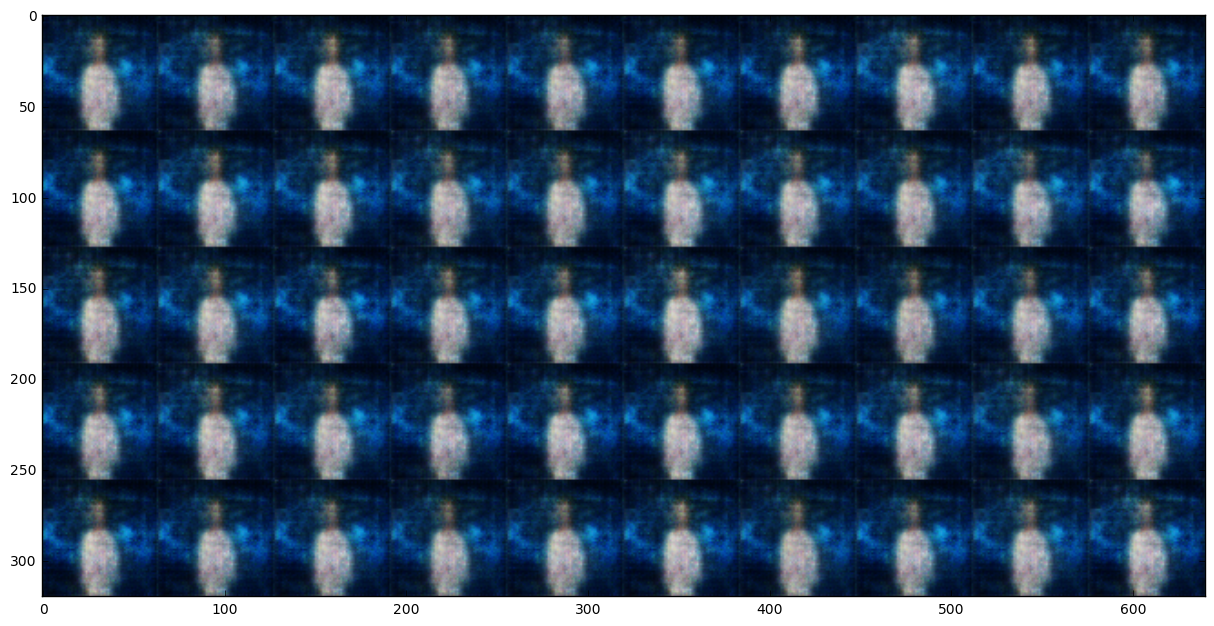

In [6]:
# creating a reconstruction of the input image and plotting it
out = autoencoder.reconstruct_image(sess, input_image)

# now for the plotting! 
w = 10
h = 5
figure = np.zeros([64 * h, 64 * w, 3], dtype = np.uint8)
k = 0
for i in range(h):
    for j in range(w):
        image = np.reshape(out[k], [64, 64, 3])
        figure[i * 64: (i + 1) * 64,
               j * 64: (j + 1) * 64,
               :] = image
        k += 1
    
plt.figure(figsize=(15, 15))
plt.imshow(figure)
plt.show()